In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings


#and 연산 

x_anddata= [[0,0],
            [0,1],
            [1,0],
            [1,1]]
y_anddata=[[0],[0],[0],[1]]

print(y_anddata)

X = tf.placeholder(shape=[None,2],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,1],dtype = tf.float32  )

W= tf.Variable(tf.random_normal([2,1]), name="weight"  )
b= tf.Variable(tf.random_normal([1]),name="bias")

logit = tf.matmul(X,W)+b

H=tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( logits=logit , labels=Y ))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_anddata,Y:y_anddata} )
    if step%300 == 0 :
        print("cost:{}".format(cost_val))

predict = tf.cast(H>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
                                            #0.5보다 크면 1로 떨어짐
correct = tf.equal(predict,Y) #실데이터와 예측한 것을 비교하는것 

accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_anddata,Y:y_anddata} ) ))
        

    

In [8]:
# ## Multiple layer 를 이용한 XOR문제 해결

# import tensorflow as tf

# # 1. Training data set

# x_data = [[0,0],
#          [0,1],
#          [1,0],
#          [1,1]]

# y_data = [[0],[1],[1],[0]]

# #2. placeHolder

# X = tf.placeholder(shape = [None,2], dtype = tf.float32)
# Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# #3. Weight &bias
# W1 = tf.Variable(tf.random_normal([2,256]), name = "whight1") #한 레이어에서 wide 하게 20개로 늘림. 2->20 로지스틱 숫자 늘리기
# b1 = tf.Variable(tf.random_normal([256]), name = "bias1") #출력 256개

# layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

# W2 = tf.Variable(tf.random_normal([256,512]), name = "whight2") #한 레이어에서 wide 하게 20개로 늘림. 512 = 로지스틱 숫자 , 클수록 정확
# b2 = tf.Variable(tf.random_normal([512]), name = "bias2") #출력 256개

# layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2) #depts 3개 딥 네트워크. 너무 깊게 하면 오히려 학습이 안되는 경우가 있다. 

# #학습이 너무 잘되면 over fitting 이 발생, 실제 예측이 엇나감. 적정 선을 유지해야 합니다. 

# W3 = tf.Variable(tf.random_normal([512,1]), name = "whight3") #행렬 곱 연산이 일어나도록 수정#입력 256개
# b3 = tf.Variable(tf.random_normal([1]), name = "bias3") #최종 값은 하나

# #4. Hypothesis
# logit = tf.matmul(layer2,W3) + b3 
# H = tf.sigmoid(logit)

# cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,labels=Y ))

# train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# sess=tf.Session()
# sess.run(tf.global_variables_initializer())

# for step in range(30000):
#     _,cost_val = sess.run([train,cost], feed_dict={X:x_data , Y:y_data})
    
#     if step%3000==0 :
#         print("cost:{}".format(cost_val))

# predict = tf.cast(H>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
#                                             #0.5보다 크면 1로 떨어짐
# correct = tf.equal(predict,Y) #실데이터와 예측한 것을 비교하는것 

# accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))


# print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_data,Y:y_data} ) ))


# #prediction 예측

# print("예측값={}".format(sess.run(predict,feed_dict={X:x_data,Y:y_data})))


cost:2.7065720558166504
cost:0.00013740842405240983
cost:8.53808960528113e-05
cost:6.267914432100952e-05
cost:4.983652615919709e-05
cost:4.154649650445208e-05
cost:3.5734479752136394e-05
cost:3.1429590308107436e-05
cost:2.8106787794968113e-05
cost:2.5461282348260283e-05
정확도 =1.0
예측값=[[0.]
 [1.]
 [1.]
 [0.]]


In [3]:
## MNIST -Multinomial Classification

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

#1. Data Loading
mnist = input_data.read_data_sets("./Data/mnist",one_hot = True) #one hot형태의 y 측 데이터 로딩

#2. Placeholer
##입력 데이터는 image data, 3차원 가로 세로 칼럼(depts 3 rgb color,빨노초 3레이어 지금은 흑백이어서 2차원 data.)
##2차원 데이터 이미지 데이터. 
#원래는 이미지 개수 가로 세로 칼라.-> 가로세로를 pixel data로 제공 = 이미지 데이터를 1차원으로 제공 28*28 = 784개의 열
#, 칼라도 흑백으로 생략 -> 2차원

X = tf.placeholder(shape = [None,784], dtype = tf.float32)
Y = tf.placeholder(shape = [None,10], dtype = tf.float32) #one hot 인코딩 y label

#3. Weight &bias
# W = tf.Variable(tf.random_normal([784,10]), name ="weight")
# b = tf.Variable(tf.random_normal([10]), name ="bias")
W1 = tf.Variable(tf.random_normal([784,256]), name ="weight1")
b1 = tf.Variable(tf.random_normal([256]), name ="bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([256,512]), name ="weight2")
b2 = tf.Variable(tf.random_normal([512]), name ="bias2")
layer2 = tf.sigmoid(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([512,10]), name ="weight3")
b3 = tf.Variable(tf.random_normal([10]), name ="bias3")

#4. Hypothesis
# logit = tf.matmul(X,W) + b
# H = tf.nn.sotfmax(logit) #확률값으로 결과를 얻는 방법
logit = tf.matmul(layer2,W3) +b3
H = tf.nn.softmax(logit)
#지금은 layer추가하고 있다는 점 유의.

# 5. Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,labels=Y))

#6. Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#7. Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)
#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Extracting ./Data/mnist\train-images-idx3-ubyte.gz
Extracting ./Data/mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/mnist\t10k-labels-idx1-ubyte.gz
3.6376514
2.0265338
1.2301319
1.0275302
1.1596653
0.6793493
0.73589736
0.6498156
0.49743897
0.6619822
0.8542


In [5]:
## MNIST -Multinomial Classification#relu

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

#1. Data Loading
mnist = input_data.read_data_sets("./Data/mnist",one_hot = True) #one hot형태의 y 측 데이터 로딩

#2. Placeholer
##입력 데이터는 image data, 3차원 가로 세로 칼럼(depts 3 rgb color,빨노초 3레이어 지금은 흑백이어서 2차원 data.)
##2차원 데이터 이미지 데이터. 
#원래는 이미지 개수 가로 세로 칼라.-> 가로세로를 pixel data로 제공 = 이미지 데이터를 1차원으로 제공 28*28 = 784개의 열
#, 칼라도 흑백으로 생략 -> 2차원

X = tf.placeholder(shape = [None,784], dtype = tf.float32)
Y = tf.placeholder(shape = [None,10], dtype = tf.float32) #one hot 인코딩 y label

#3. Weight &bias
# W = tf.Variable(tf.random_normal([784,10]), name ="weight")
# b = tf.Variable(tf.random_normal([10]), name ="bias")
W1 = tf.Variable(tf.random_normal([784,256]), name ="weight1")
b1 = tf.Variable(tf.random_normal([256]), name ="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([256,512]), name ="weight2")
b2 = tf.Variable(tf.random_normal([512]), name ="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([512,10]), name ="weight3")
b3 = tf.Variable(tf.random_normal([10]), name ="bias3")

#4. Hypothesis
# logit = tf.matmul(X,W) + b
# H = tf.nn.sotfmax(logit) #확률값으로 결과를 얻는 방법
H = tf.matmul(layer2,W3) +b3
# H = tf.nn.softmax(logit)안해도 됨


# 5. Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H,labels=Y))

#6. Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#7. Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)

#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Extracting ./Data/mnist\train-images-idx3-ubyte.gz
Extracting ./Data/mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/mnist\t10k-labels-idx1-ubyte.gz
24.631128
4.0394263
2.6461957
0.64890146
0.31953064
0.08266126
8.842596e-05
2.9294455e-05
0.0
0.0
0.9449


In [10]:
## MNIST -Multinomial Classification#relu#Xavier initialization 도입 초기 W값 지정

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf


tf.reset_default_graph()
#1. Data Loading
mnist = input_data.read_data_sets("./Data/mnist",one_hot = True) #one hot형태의 y 측 데이터 로딩

#2. Placeholer
##입력 데이터는 image data, 3차원 가로 세로 칼럼(depts 3 rgb color,빨노초 3레이어 지금은 흑백이어서 2차원 data.)
##2차원 데이터 이미지 데이터. 
#원래는 이미지 개수 가로 세로 칼라.-> 가로세로를 pixel data로 제공 = 이미지 데이터를 1차원으로 제공 28*28 = 784개의 열
#, 칼라도 흑백으로 생략 -> 2차원

X = tf.placeholder(shape = [None,784], dtype = tf.float32)
Y = tf.placeholder(shape = [None,10], dtype = tf.float32) #one hot 인코딩 y label

#3. Weight &bias
# W = tf.Variable(tf.random_normal([784,10]), name ="weight")
# b = tf.Variable(tf.random_normal([10]), name ="bias")
#W1 = tf.Variable(tf.random_normal([784,256]), name ="weight1")
W1 = tf.get_variable("wight1",shape = [784,256], initializer=  tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name ="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

#W2 = tf.Variable(tf.random_normal([256,512]), name ="weight2")
W2 = tf.get_variable("wight2",shape = [256,512], initializer= tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), name ="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

#W3 = tf.Variable(tf.random_normal([512,10]), name ="weight3")
W3 = tf.get_variable("wight3",shape = [512,10], initializer= tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name ="bias3")

#4. Hypothesis
# logit = tf.matmul(X,W) + b
# H = tf.nn.sotfmax(logit) #확률값으로 결과를 얻는 방법
H = tf.matmul(layer2,W3) +b3
# H = tf.nn.softmax(logit)안해도 됨


# 5. Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H,labels=Y))

#6. Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#7. Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)

#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Extracting ./Data/mnist\train-images-idx3-ubyte.gz
Extracting ./Data/mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/mnist\t10k-labels-idx1-ubyte.gz
0.6762993
0.41321594
0.3357047
0.34630498
0.25484332
0.18033093
0.10422319
0.22170722
0.093595535
0.09794306
0.9594


In [11]:
## MNIST -Multinomial Classification#relu#Xavier initialization 도입 초기 W값 지정#Drop out(overfitting 방지)

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf


tf.reset_default_graph()
#1. Data Loading
mnist = input_data.read_data_sets("./Data/mnist",one_hot = True) #one hot형태의 y 측 데이터 로딩

#2. Placeholer
##입력 데이터는 image data, 3차원 가로 세로 칼럼(depts 3 rgb color,빨노초 3레이어 지금은 흑백이어서 2차원 data.)
##2차원 데이터 이미지 데이터. 
#원래는 이미지 개수 가로 세로 칼라.-> 가로세로를 pixel data로 제공 = 이미지 데이터를 1차원으로 제공 28*28 = 784개의 열
#, 칼라도 흑백으로 생략 -> 2차원

X = tf.placeholder(shape = [None,784], dtype = tf.float32)
Y = tf.placeholder(shape = [None,10], dtype = tf.float32) #one hot 인코딩 y label

#3. Weight &bias
# W = tf.Variable(tf.random_normal([784,10]), name ="weight")
# b = tf.Variable(tf.random_normal([10]), name ="bias")
#W1 = tf.Variable(tf.random_normal([784,256]), name ="weight1")
keep = tf.placeholder(dtype = tf.float32) #입력 값으로 사용하겠다. 상수로 박지 않고. 
W1 = tf.get_variable("wight1",shape = [784,256], initializer=  tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name ="bias1")
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep) #keepprob 유지할 확률 0.5~0.7
#W2 = tf.Variable(tf.random_normal([256,512]), name ="weight2")
W2 = tf.get_variable("wight2",shape = [256,512], initializer= tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), name ="bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep)
#W3 = tf.Variable(tf.random_normal([512,10]), name ="weight3")
W3 = tf.get_variable("wight3",shape = [512,10], initializer= tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name ="bias3")

#4. Hypothesis
# logit = tf.matmul(X,W) + b
# H = tf.nn.sotfmax(logit) #확률값으로 결과를 얻는 방법
H = tf.matmul(layer2,W3) +b3
# H = tf.nn.softmax(logit)안해도 됨


# 5. Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H,labels=Y))

#6. Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#7. Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#8.학습   => 이전의 for문 방법은 데이터가 작기때문에 가능했다, but 데이터가 커지면 대치처리를 해줘야 함
train_epoch = 30   #우리가 가지고 있는 데이터를 가지고 n번 학습하는 것 = n epoch
batch_size = 100   #한번에 읽어들일 데이터의 크기, 몇개씩 잘라서 들고올건가
for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)  #반복횟수 : 전체데이터 / batch_size 
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)       #전체의 훈련데이터(mnist.train)에서 데이터를 100개씩 가져옴
        _, cost_val= sess.run([train, cost],feed_dict={X:batch_x,Y:batch_y,keep:0.7})
        
    if step % 3 == 0:
        print(cost_val)
        
#accuracy
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)

#정확도 출력
print(sess.run(accuracy, feed_dict={X:mnist.test.images,Y:mnist.test.labels, keep:1}))

Extracting ./Data/mnist\train-images-idx3-ubyte.gz
Extracting ./Data/mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/mnist\t10k-labels-idx1-ubyte.gz
0.8976872
0.61608267
0.25697765
0.42058846
0.4338282
0.18917851
0.23240094
0.14603838
0.15598248
0.3351928
0.9578


In [29]:
import tensorflow as tf
import numpy as np #4차원 배열 직접 만들겁니다. 

# Image Shape -> (1,3,3,1) -> (이미지 개수, 가로 , 세로, 색) 1은 흑백 #1행 3행, 3행, 1행 각각 표현 
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)
image.shape
#filter의 shape => (2,2,1,1)=> (가로, 세로, color, 필터 개서)
W = np.array([[[[1,100,-10]],[[1,100,-10]]],[[[1,100,-10]],[[1,100,-10]]]],dtype = np.float32)
# layers 이용하면 random으로 잡을 수 있다. 

conv2d = tf.nn.conv2d(image, W, strides=[1,1,1,1], padding = "VALID")
conv2d = tf.nn.relu(conv2d)
#tf내에서 layers 패키지가 사용하기 더 쉬움. 
# conv2d = tf.layers.conv2d(inputs=image, filters=32,
#                           kernel_size=[2,2],padding ="valid",
#                          strides = 1,activation = tf.nn.relu) #필터 몇 개 쓸 것인지는 지정해야함. #relu() 안쓰고 함수 지정만. 
sess = tf.Session()
sess.run(conv2d)

array([[[[  12., 1200.,    0.],
         [  16., 1600.,    0.]],

        [[  24., 2400.,    0.],
         [  28., 2800.,    0.]]]], dtype=float32)

In [27]:
import tensorflow as tf
import numpy as np

#image -> (1,2,2,1)
images = np.array([[[[4],[3]],[[2],[1]]]],dtype = np.float32)
images.shape

pool = tf.nn.max_pool(images, ksize = [1,2,2,1], strides = [1,1,1,1],
                     padding = "SAME")
sess.run(pool)

array([[[[4.],
         [3.]],

        [[2.],
         [1.]]]], dtype=float32)

Extracting ./Data/Mnist\train-images-idx3-ubyte.gz
Extracting ./Data/Mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/Mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/Mnist\t10k-labels-idx1-ubyte.gz


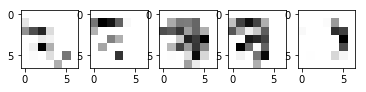

In [8]:
###MNIST 이미지 1장으로 Convalution과 MAX Pooling 처리

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#1. Data Loading
mnist = input_data.read_data_sets("./Data/Mnist",one_hot = True)

#2. 처음 한 장의 이미지만 가지고 해보자. 
img = mnist.train.images[0]
# plt.imshow(img.reshape(28,28),cmap = "Greys")
# plt.show()

#3. Convolution 
#원본데이터의 형태 변경 1차배열 -> 4차배열
img = tf.reshape(img, shape = [-1,28,28,1]) #-1 이미지 수로 채워

#4. 필터 정의
##filter 크기 3*3, 필터 개수 5

W = tf.Variable(tf.random_normal([3,3,1,5])) #[]커널 가로 세로, 컬러, 필터 수 

conv2d = tf.nn.conv2d(img, W, strides = [1,2,2,1], padding = "SAME")

#padding same 원본과 같은 크기인 것은 스트라이드가 1일 때. 지금 2칸씩일 때는 사이즈 절반으로 줄어든다. 


#tf.nn.relu
conv2d = tf.nn.relu(conv2d) 

#Max pooling(sub sampling)
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], #샘플 크기2by2, 패딩하여 사차원 배열 만들기 위해 앞뒤에 1,1
                     strides = [1,2,2,1],#샘플 이동 간격
                     padding="SAME")#데이터 유실 방지. 
#cf. 평균값으로 풀링하는 방법도 있지만, max가 가장 효율이 좋음. 

sess = tf.Session()
sess.run(tf.global_variables_initializer())
result = sess.run(pool)
result.shape #(1, 14, 14, 5) #결과물 원래 1장 이미지, 크기 1414 필터 수에 따라 5장 이미지 생성. 
##결과 이미지를 보기 편하기 위한 데이터 처리 - 축 변경 (5,14,14,1)
#=> (1, 7, 7, 5) strides 2*2해서 작아짐. #해상도는 떨어지지만 특징을 더 잡아냈음. 
result = np.swapaxes(result,0,3)
result.shape #->(5, 14, 14, 1)
# for loop로 이미지 뽑을 수 있다. 다섯번 돌리겠다 .

fig,axes = plt.subplots(1,5)

for idx, t_img in enumerate(result):
    axes[idx].imshow(t_img.reshape(7,7), cmap="Greys")
    
plt.show()

In [4]:
#MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

tf.reset_default_graph()

#1. Data Loading
mnist = input_data.read_data_sets("./Data/Mnist", one_hot = True) 
#원래 폴더 없다면 만들어서 데이터 넣어준다. #one_hot y측 레이블 여러개

#2. Placeholder
X = tf.placeholder(shape = [None,784], dtype = tf.float32)
 #데이터 개수 미정, 컬럼 784개 (잘 알려진 예제이다. )
Y = tf.placeholder(shape = [None,10], dtype = tf.float32)
keep_rate = tf.placeholder(dtype = tf.float32) #스칼라이므로 모양 잡을 필요 없다. dropout비율

#3. Convolution Layer
##3.1 . Layer1 (여러개의 계층으로 구성할 수 있다. )
#이미지 데이터를 사차 배열로 바꿔야 함. (이미지 수, 가로, 세로, 색)
X_img = tf.reshape(X,shape = [-1,28,28,1]) #[,,,] 4차 배열
#텐서로 모양 바꾸면 텐서 타입으로 빠진다. #-1 나머지를 이미지 사이즈로 만들어. 데이터 개수를 계산하지 않을거야

#    filter생성
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01)) #3*3크기, 깊이 1 흑백, 서른 두개의 필터#표준편차 설정 비슷한 값 도출
#    Convolution
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = "SAME") #1*1이고 패딩 작업
#    ReLU
L1 = tf.nn.relu(L1)
#    Max Pooling
L1 = tf.nn.max_pool(L1, ksize= [1,2,2,1],strides = [1,2,2,1], padding ="SAME" )

##3.1 . Layer1 
#    Filter,Convolution,ReLU
L2 = tf.layers.conv2d(inputs= L1, filters = 64, kernel_size = [3,3],  #패키지가 다름. #ksize정수로 떨어지도록 계산해야한다. 
                     padding ="SAME", strides = 1, activation = tf.nn.relu)
#Max pooling
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size = [2,2], padding="SAME", strides = 2) #ksize와 같은 내용 다른 표현 psize
#이미지 크기 반으로 줄어든다. 

##시간을 절약하려면 dropout 하면 된다. 

###end Convolution Layer

#4. FC(Neural Network)
#데이터에 대한 2차 배열 이미지로 바꾸어야 한다. 
L2 = tf.reshape(L2, shape = [-1, 7*7*64]) #L2.shape(?,7,7,64)

#5. Weight & bias
W2 = tf.get_variable("weight2", shape= [7*7*64,256],initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name="bias2")

_layer1 = tf.nn.relu(tf.matmul(L2,W2) + b2)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_rate)

W3 = tf.get_variable("weight3", shape= [256,256],initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]), name="bias3")

_layer2 = tf.nn.relu(tf.matmul(layer1,W3) + b3)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_rate)

W4 = tf.get_variable("weight4", shape= [256,10],initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([10]), name="bias4")

#6. Hypothesis
H = tf.matmul(layer2,W4) + b4

#7. Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H, labels= Y))

#8. Train
train = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

#9. Session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#10. 학습 
#gpu 쓸 때는 리소스 때문에 배치를 해야한다. 

num_of_epoch = 10
batch_size = 100

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X:batch_x, Y:batch_y, keep_rate:0.5}) 
        #0.25 노드 많을 때, 0.7도 사용
    
    print("Cost :{}".format(cost_val))
    
#accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict,tf.argmax(Y,1))

accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("정확도 :{}".format(sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels, keep_rate:1})))

# accuracy = tf.reduce_sum(tf.cast(correct, dtype = tf.float32))

# result_sum = 0:
#     num_of_iter = int(mnist.test.num_examples/batch_size)
    
#     for i in range(num_of_iter):
#         batch_x, batch_y = mnist.train.next_batch(batch_size)
#         correct_num = sess.run([train, cost], feed_dict={X:batch_x, Y:batch_y, keep_rate:1}) 
#         result_sum += correct_num
# print("정확도 :{}".format(result_sum/10000))

Extracting ./Data/Mnist\train-images-idx3-ubyte.gz
Extracting ./Data/Mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/Mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/Mnist\t10k-labels-idx1-ubyte.gz
Cost :0.10711287707090378
Cost :0.11915435642004013
Cost :0.08680844306945801
Cost :0.048987120389938354
Cost :0.04479017108678818
Cost :0.03238360211253166
Cost :0.026623820886015892
Cost :0.00797225721180439
Cost :0.03428422287106514
Cost :0.0451173409819603
정확도 :0.9905999898910522


In [3]:
type(mnist.train.next_batch(batch_size))

tuple

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

tf.reset_default_graph()

#1. Data Loading
mnist = input_data.read_data_sets("./Data/Mnist", one_hot = True) 

mnist.train.num_examples

Extracting ./Data/Mnist\train-images-idx3-ubyte.gz
Extracting ./Data/Mnist\train-labels-idx1-ubyte.gz
Extracting ./Data/Mnist\t10k-images-idx3-ubyte.gz
Extracting ./Data/Mnist\t10k-labels-idx1-ubyte.gz


55000

In [ ]:
accuracy = tf.reduce_sum(tf.cast(correct, dtype = tf.float32))

result_sum = 0:
    num_of_iter = int(mnist.test.num_examples/batch_size)
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        correct_num = sess.run([train, cost], feed_dict={X:batch_x, Y:batch_y, keep_rate:1}) 
        result_sum += correct_num
print("정확도 :{}".format(result_sum/10000))

 Mnist 해결 메커니즘
 하나의 모델을 생성
 CNN(Convolution later, Neural network)
 Train data를 이용해서 해당 모델을 학습
 가설을 만들기 위해 학습을 진행. H를 위해 W와 b값을 찾음. 
 Hypothesis를 이용해서 예측값을 도출할 수 있다. 
 test data(입력 feature)가 해당 모델에 들어간다. 
 H => [0.12, 0.02, 0.33 ... 0.21] 
 SoftMax 를 통해 얻는 최초의 값들 = 예측값 = 확률값. 
 onehotencoding개수 만큼 들어있고, 각각의 확률값. 
 모두 더하면 1이 나온다. 
 이 중 가장 큰 값을 찾아 몇번째 있는지 센다. 
 H에 argmax취하면 가장 큰 값의 index를 얻어낼 수 있고, 
 이 값을 입력 label의 argmax와 비교하여 결과를 얻는다. 
 만약 같으면 예측이 잘 된 것. 
 랜덤 값을 이용하기 때문에 학습 결과에 차이가 있음. 
 여러 개의 모델을 동시에 이용 - 앙상블 2~5% 정도 상승함. 
    
   #ensemble(앙상블)
   모델이 여러개. 10개
   각각의 모델을 학습시킨다. 
   각 모델의 입력 파라메터 (이미지 픽셀)을 넣어 예측값을 알아낸다. 
   모델마다의 H값을 도출. 
   각 열마다 더한 값에서 다시 argmax취함. 
   

In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
data = pd.read_csv("./Data/Digit/train.csv", sep = ",")
test = pd.read_csv("./Data/Digit/test.csv", sep=",")
test = np.array(test.values, dtype = np.float32)

sess = tf.Session()
seg = int(data.shape[0]*0.7)
train_data = data.loc[:seg,:]
test_data = data.loc[seg:,:]
train_y = tf.one_hot(train_data.iloc[:,0],10)
train_y.get_shape().as_list()[1]

10